In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
tickers = ["BLK", "BAC", "AAPL", "TM", "WMT",
           "JD", "INTU", "MA", "UL", "CVS",
           "DIS", "AMD", "NVDA", "PBI", "TGT"]

In [3]:
ohlc = yf.download(tickers, period="5y")

[*********************100%***********************]  15 of 15 completed


In [4]:
ohlc.tail()
prices = ohlc["Close"].dropna(how="all")
prices.tail()     

Ticker,AAPL,AMD,BAC,BLK,CVS,DIS,INTU,JD,MA,NVDA,PBI,TGT,TM,UL,WMT
Date,,,,,,,,,,,,,,,
2024-12-24,258.200012,126.290001,44.380001,1054.829956,44.250000,112.559998,645.289978,36.459999,535.710022,140.220001,7.36,132.399994,181.429993,57.189999,92.680000
2024-12-26,259.019989,125.059998,44.549999,1054.280029,44.919998,112.550003,646.190002,36.130001,536.150024,139.929993,7.33,136.389999,197.360001,57.520000,92.790001
2024-12-27,255.589996,125.190002,44.340000,1044.180054,44.490002,111.550003,638.570007,34.980000,532.200012,137.009995,7.29,135.500000,199.520004,57.459999,91.660004
2024-12-30,252.199997,122.440002,43.910000,1027.430054,43.939999,110.800003,630.299988,34.259998,525.549988,137.490005,7.24,135.050003,195.660004,56.759998,90.570000
2024-12-31,250.419998,120.790001,43.950001,1025.109985,44.889999,111.349998,628.500000,34.669998,526.570007,134.289993,7.24,135.179993,194.610001,56.700001,90.349998


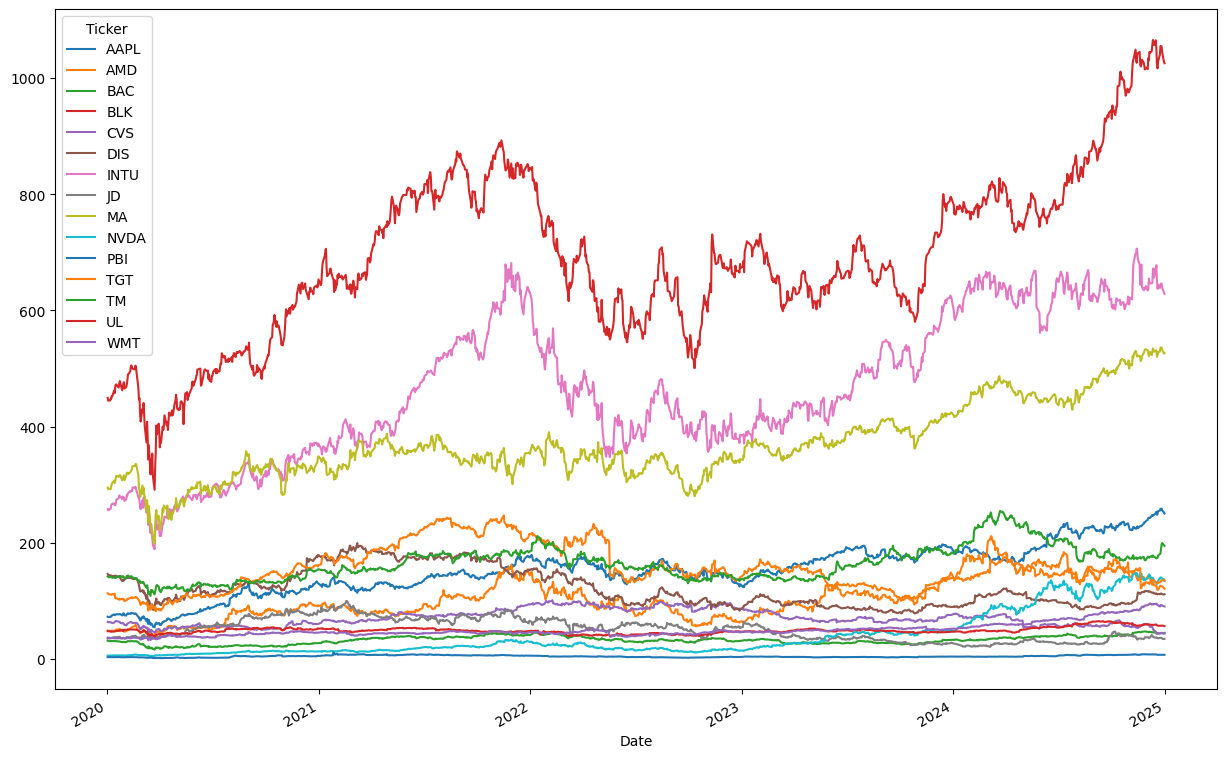

In [5]:
prices[prices.index >= "2020-01-01"].plot(figsize=(15,10))

In [6]:
# Calculate the covariance matrix 

from pypfopt import risk_models
from pypfopt import plotting

sample_cov = risk_models.sample_cov(prices, frequency=252)
sample_cov
     


Ticker,AAPL,AMD,BAC,BLK,CVS,DIS,INTU,JD,MA,NVDA,PBI,TGT,TM,UL,WMT
Ticker,,,,,,,,,,,,,,,
AAPL,0.100353,0.093347,0.046809,0.058464,0.028825,0.047196,0.077137,0.060850,0.058100,0.103501,0.068268,0.040695,0.032710,0.025861,0.025978
AMD,0.093347,0.275202,0.058410,0.076906,0.034226,0.062610,0.111746,0.097819,0.071252,0.211132,0.076337,0.060513,0.049862,0.026856,0.026891
BAC,0.046809,0.058410,0.127748,0.075874,0.051207,0.070729,0.060949,0.045339,0.065396,0.060659,0.109659,0.047942,0.042561,0.029749,0.020625
BLK,0.058464,0.076906,0.075874,0.099231,0.037732,0.060459,0.074116,0.054710,0.064432,0.088843,0.081486,0.047053,0.039772,0.033341,0.023843
CVS,0.028825,0.034226,0.051207,0.037732,0.092614,0.030130,0.029436,0.019202,0.031434,0.026399,0.046840,0.034970,0.022697,0.020420,0.022401
DIS,0.047196,0.062610,0.070729,0.060459,0.030130,0.115353,0.062153,0.046461,0.064408,0.070724,0.082714,0.040089,0.035275,0.023580,0.017899
INTU,0.077137,0.111746,0.060949,0.074116,0.029436,0.062153,0.141445,0.071989,0.073842,0.127366,0.065907,0.050936,0.037614,0.030057,0.025639
JD,0.060850,0.097819,0.045339,0.054710,0.019202,0.046461,0.071989,0.311684,0.048166,0.100952,0.071456,0.047403,0.038811,0.026040,0.012944
MA,0.058100,0.071252,0.065396,0.064432,0.031434,0.064408,0.073842,0.048166,0.095963,0.081238,0.069517,0.035278,0.035818,0.028213,0.019601


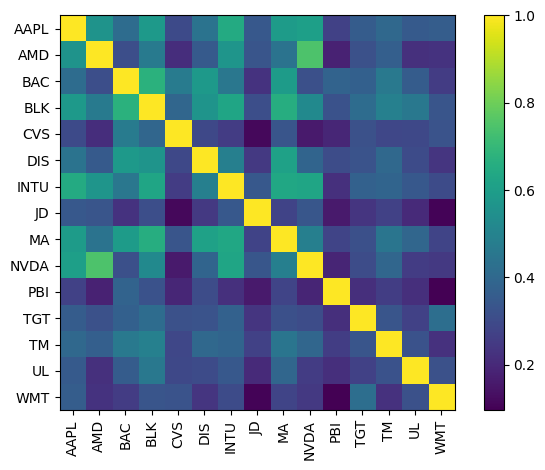

In [7]:
plotting.plot_covariance(sample_cov, plot_correlation=True);
     

However, the sample covariance matrix should not be the default choice for risk model. In the below we will use Ledoit-Wolf shrinkage that reduces extreme values.

In [8]:
from pypfopt import expected_returns

mu = expected_returns.capm_return(prices)
mu

Ticker
AAPL    0.194815
AMD     0.299173
BAC     0.205040
BLK     0.205625
CVS     0.118612
DIS     0.186217
INTU    0.233469
JD      0.236497
MA      0.189107
NVDA    0.318244
PBI     0.351304
TGT     0.166925
TM      0.128793
UL      0.096035
WMT     0.080247
Name: mkt, dtype: float64

In [9]:
from pypfopt import EfficientFrontier
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()
ef = EfficientFrontier(mu, S, weight_bounds = (0,1))

In [10]:
ef.max_sharpe()
weights = ef.clean_weights()
weights

OrderedDict([('AAPL', 0.06685),
             ('AMD', 0.06764),
             ('BAC', 0.06814),
             ('BLK', 0.06818),
             ('CVS', 0.06608),
             ('DIS', 0.0666),
             ('INTU', 0.06768),
             ('JD', 0.06724),
             ('MA', 0.06696),
             ('NVDA', 0.06821),
             ('PBI', 0.06775),
             ('TGT', 0.06751),
             ('TM', 0.06437),
             ('UL', 0.0637),
             ('WMT', 0.06309)])

In [11]:
ef.portfolio_performance(verbose = True)

Expected annual return: 20.2%
Annual volatility: 24.2%
Sharpe Ratio: 0.83


(np.float64(0.20210446308919214),
 np.float64(0.24247767851349075),
 np.float64(0.833497187568742))

## Adding an ESG score constraint

In [12]:
esg_scores = [0.8, 0.8, 0.4, 0.3, 0.3, 0.5, 0.3, 0.6, 0.7, 0.2, 0.4, 0.1, 0.5, 0.4, 0.8]

In [13]:
portfolio_min_score = 0.6 # create a portfolio with min 0.6 ESG score

In [14]:
ef_esg = EfficientFrontier(mu, S)
ef_esg.add_constraint(lambda w: esg_scores @ w >= portfolio_min_score)
ef_esg.max_sharpe()

OrderedDict([('AAPL', 0.1281442076416123),
             ('AMD', 0.1102954176114798),
             ('BAC', 0.0738953087406087),
             ('BLK', 0.0295044031236569),
             ('CVS', 0.0254518666542146),
             ('DIS', 0.065636864646375),
             ('INTU', 0.0269009063976741),
             ('JD', 0.0733114915296142),
             ('MA', 0.1203179149283293),
             ('NVDA', 0.0224726143190269),
             ('PBI', 0.0682220020342357),
             ('TGT', 0.0164754819708751),
             ('TM', 0.0659986493467382),
             ('UL', 0.0275583440864271),
             ('WMT', 0.1458145269691322)])

In [15]:
ef_esg.portfolio_performance(verbose = True)

Expected annual return: 19.8%
Annual volatility: 24.0%
Sharpe Ratio: 0.82


(np.float64(0.1975098637978079),
 np.float64(0.2396636753786275),
 np.float64(0.8241126382034165))

<Axes: xlabel='Volatility', ylabel='Return'>

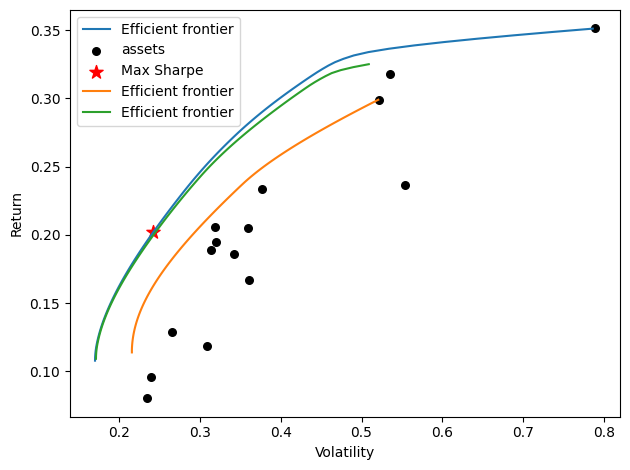

In [16]:
ef = EfficientFrontier(mu, S, weight_bounds = (0,1))
fig, ax = plt.subplots()
ef_max_sharpe = ef.deepcopy()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)

# Find the tangency portfolio
ef_max_sharpe.max_sharpe()
ret_tangent, std_tangent, _ = ef_max_sharpe.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

ef_esg_aggressive = EfficientFrontier(mu, S)
portfolio_min_score = 0.8
ef_esg_aggressive.add_constraint(lambda w: esg_scores @ w >= portfolio_min_score)
plotting.plot_efficient_frontier(ef_esg_aggressive, ax=ax, show_assets=False)

ef_esg_mild = EfficientFrontier(mu, S)
portfolio_min_score = 0.6
ef_esg_mild.add_constraint(lambda w: esg_scores @ w >= portfolio_min_score)
plotting.plot_efficient_frontier(ef_esg_mild, ax=ax, show_assets=False)


In [17]:
ef_esg_mild = EfficientFrontier(mu, S)
portfolio_min_score = 0.6
ef_esg_mild.add_constraint(lambda w: esg_scores @ w >= portfolio_min_score)
ef_esg_mild.max_sharpe()
esg_mild = ef_esg_mild.portfolio_performance(verbose = False)

In [18]:
ef_esg_aggressive = EfficientFrontier(mu, S)
portfolio_min_score = 0.8
ef_esg_aggressive.add_constraint(lambda w: esg_scores @ w >= portfolio_min_score)
ef_esg_aggressive.max_sharpe()
esg_agg = ef_esg_aggressive.portfolio_performance(verbose = False)

In [19]:
ef = EfficientFrontier(mu, S, weight_bounds = (0,1))
ef.max_sharpe()
no_esg = ef.portfolio_performance(verbose = False)

In [20]:
df = pd.DataFrame({'no_esg_constraints' : no_esg, 'mild_esg_target' : esg_mild, 'aggressive_esg_target' : esg_agg})
df.index = ['Expected ann return', 'Ann Vol', 'Sharpe Ratio']
df

,no_esg_constraints,mild_esg_target,aggressive_esg_target
Expected ann return,0.202104,0.197510,0.193841
Ann Vol,0.242478,0.239664,0.281731
Sharpe Ratio,0.833497,0.824113,0.688036
